In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r'C:\Users\Sooraj\Downloads\Zoo.csv')
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


<Axes: xlabel='type', ylabel='count'>

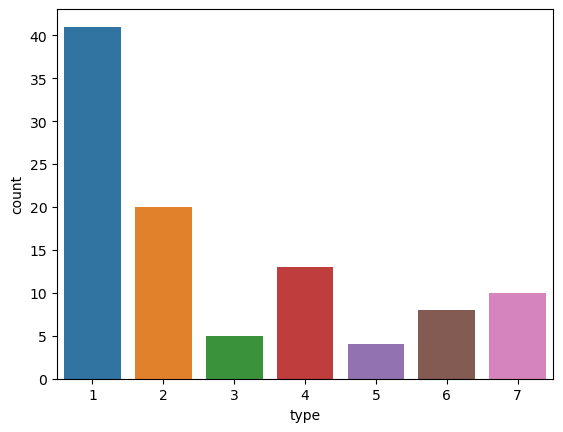

In [3]:
sns.countplot(data=data, x="type")

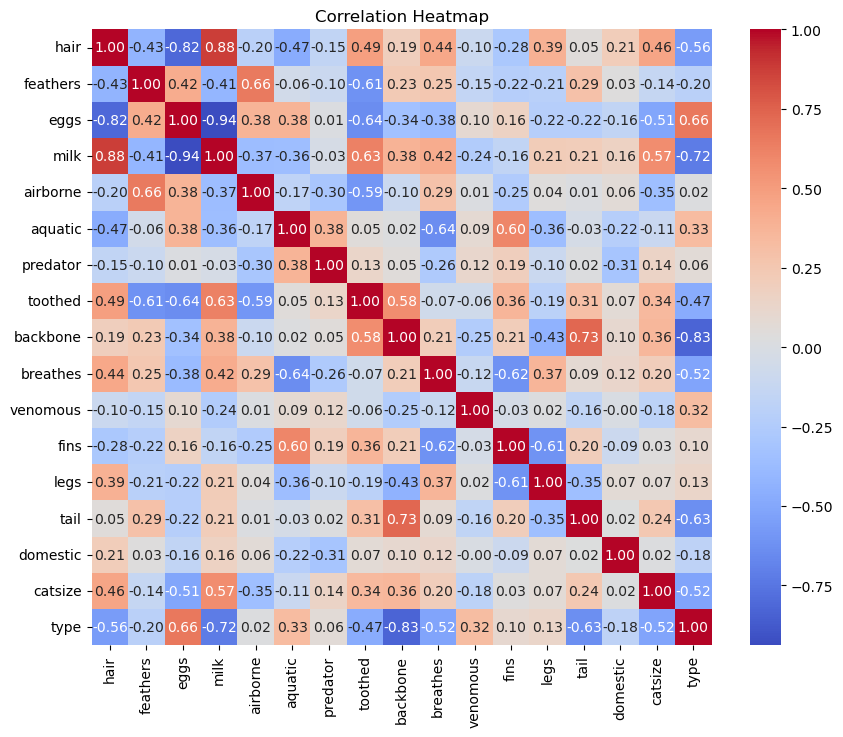

In [4]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.drop(['animal name'], axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

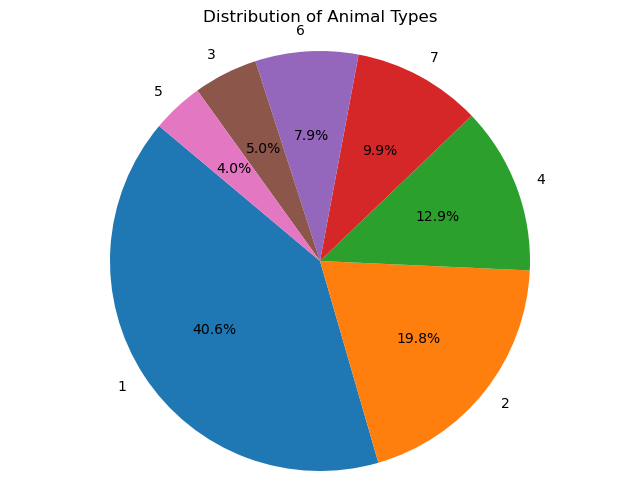

In [5]:
# Count the occurrences of each animal type
type_counts = data['type'].value_counts()

# Plot the distribution of animal types using a pie chart
plt.figure(figsize=(8, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Animal Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [6]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['animal name'] = label_encoder.fit_transform(data['animal name'])
data['type'] = label_encoder.fit_transform(data['type'])

In [7]:
# Split the data into features (X) and target variable (y)
X = data.drop(['animal name', 'type'], axis=1)
y = data['type']

In [8]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

In [10]:
# KNN Classification with Cross-Validation
num_folds = 10
kfold = KFold(n_splits=num_folds)

model = KNeighborsClassifier(n_neighbors=17)
results = cross_val_score(model, X_scaled, y, cv=kfold)

print("KNN Classification with Cross-Validation:")
print("Mean Accuracy:", results.mean())

KNN Classification with Cross-Validation:
Mean Accuracy: 0.8300000000000001


In [11]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=17)

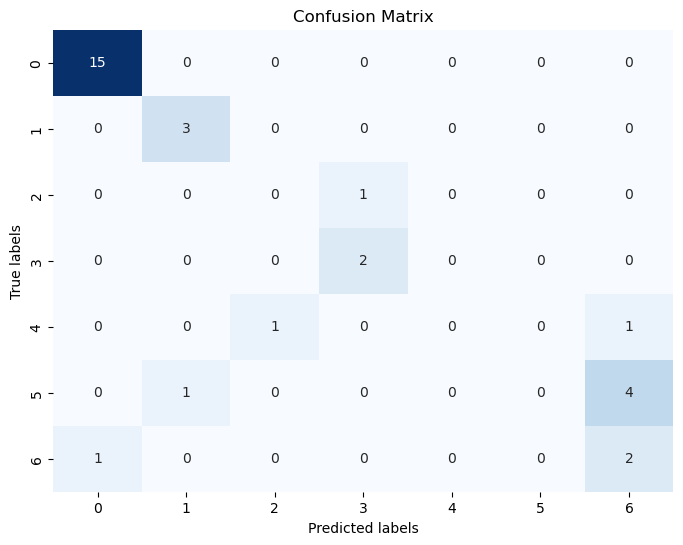

In [12]:
pred = model.predict(x_test)

conf_matrix = confusion_matrix(y_test, pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [13]:
# Grid Search for Algorithm Tuning
n_neighbors = np.array(range(1, 40))
param_grid = dict(n_neighbors=n_neighbors)

model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X_scaled, y)

print("\nGrid Search for Algorithm Tuning:")
print("Best Score:", grid.best_score_)
print("Best Parameters:", grid.best_params_)


Grid Search for Algorithm Tuning:
Best Score: 0.9504761904761905
Best Parameters: {'n_neighbors': 1}


In [14]:
# choose k between 1 to 40
k_range = range(1, 41)
k_scores = []

In [15]:
# use iteration to calculate different k in models, then return the average accuracy based on the cross-validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5)
    k_scores.append(scores.mean())

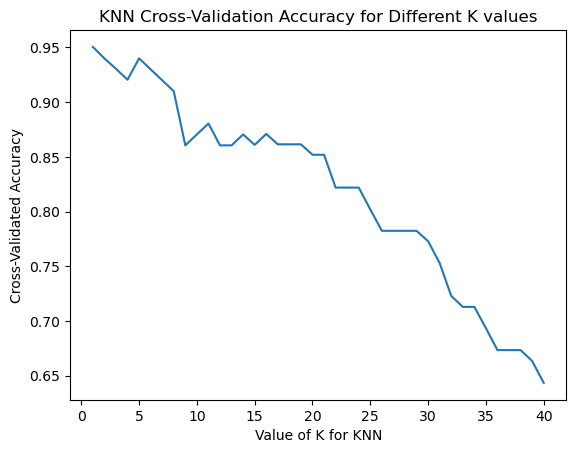

In [16]:
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Cross-Validation Accuracy for Different K values')
plt.show()